In [7]:
import qiskit
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import numpy as np
import math
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

In [8]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q,c)
circuit.initialize


<bound method initialize of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f696e517c70>>

/tmp/ipykernel_884071/3868299816.py:1: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(pi/2, pi/4, pi/7, q[0])


Statevector([0.70710678+0.j , 0.5       +0.5j, 0.        +0.j ,
             0.        +0.j , 0.        +0.j , 0.        +0.j ,
             0.        +0.j , 0.        +0.j ],
            dims=(2, 2, 2))


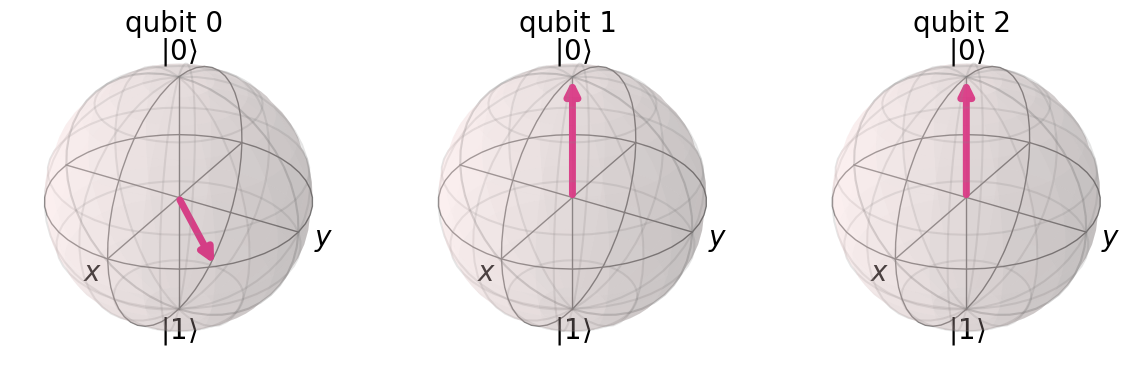

In [9]:
circuit.u3(pi/2, pi/4, pi/7, q[0])
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [11]:

circuit.h(q[2])
circuit.cx(q[2], q[1])
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.measure(q[:2], c[:2])
circuit.x(q[2]).c_if(c[1], 1)
circuit.z(q[2]).c_if(c[0], 1)
circuit.draw()

┌─────────────────┐          ┌───┐     ┌───┐┌─┐                        
q27_0: ┤ U3(π/2,π/4,π/7) ├───────■──┤ H ├──■──┤ H ├┤M├────────────────────────
       └─────────────────┘┌───┐┌─┴─┐├───┤┌─┴─┐└┬─┬┘└╥┘                        
q27_1: ───────────────────┤ X ├┤ X ├┤ X ├┤ X ├─┤M├──╫─────────────────────────
              ┌───┐       └─┬─┘├───┤└─┬─┘└───┘ └╥┘  ║    ┌───┐       ┌───┐    
q27_2: ───────┤ H ├─────────■──┤ H ├──■─────────╫───╫────┤ X ├───────┤ Z ├────
              └───┘            └───┘            ║   ║    └─╥─┘       └─╥─┘    
                                                ║   ║ ┌────╨─────┐┌────╨─────┐
 c1: 3/═════════════════════════════════════════╩═══╩═╡ c1_1=0x1 ╞╡ c1_0=0x1 ╞
                                                1   0 └──────────┘└──────────┘

Statevector([ 0.70710678-1.66533454e-16j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.5       +5.00000000e-01j, -0.        +0.00000000e+00j,
              0.        -0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


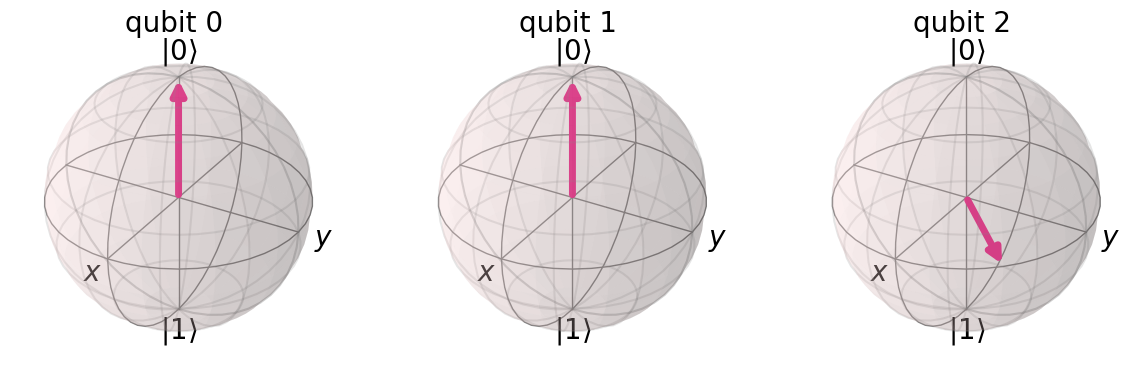

In [12]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector_b = result.get_statevector()
print(statevector_b)
plot_bloch_multivector(statevector_b)

{'011': 281, '001': 253, '000': 237, '010': 253}


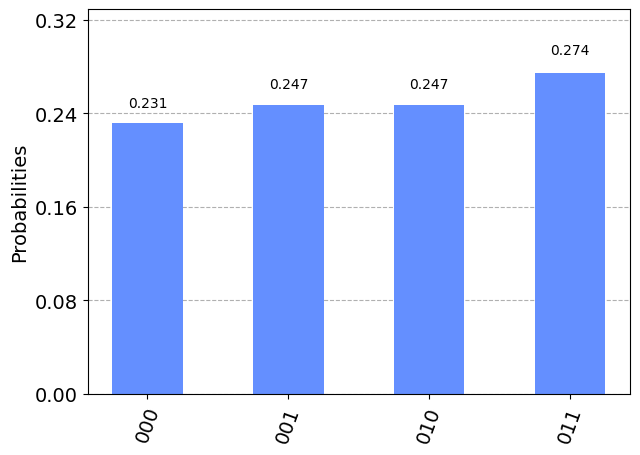

In [13]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Question 2 - (b)

In [40]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)
circuit.initialize

<bound method initialize of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f696c92f5e0>>

In [41]:
circuit.h(q[0])
circuit.h(q[2])
circuit.cx(q[0], q[1])
circuit.cx(q[2], q[3])
circuit.cx(q[1], q[2])
# circuit.h(q[1])
circuit.measure(q[1], c[1])
circuit.z(q[3]).c_if(c[1], 1)
circuit.measure(q[2], c[2])
circuit.x(q[3]).c_if(c[2], 1)

circuit.measure(q[0], c[0])
circuit.measure(q[3], c[3])
circuit.draw()

┌───┐          ┌─┐                                 
q141_0: ┤ H ├──■───────┤M├─────────────────────────────────
        └───┘┌─┴─┐     └╥┘┌─┐                              
q141_1: ─────┤ X ├──■───╫─┤M├──────────────────────────────
        ┌───┐└───┘┌─┴─┐ ║ └╥┘┌─┐                           
q141_2: ┤ H ├──■──┤ X ├─╫──╫─┤M├───────────────────────────
        └───┘┌─┴─┐└───┘ ║  ║ └╥┘   ┌───┐       ┌───┐    ┌─┐
q141_3: ─────┤ X ├──────╫──╫──╫────┤ Z ├───────┤ X ├────┤M├
             └───┘      ║  ║  ║    └─╥─┘       └─╥─┘    └╥┘
                        ║  ║  ║ ┌────╨─────┐┌────╨─────┐ ║ 
  c9: 4/════════════════╩══╩══╩═╡ c9_1=0x1 ╞╡ c9_2=0x1 ╞═╩═
                        0  1  2 └──────────┘└──────────┘ 3

{'1011': 232, '0100': 265, '0000': 283, '1111': 244}


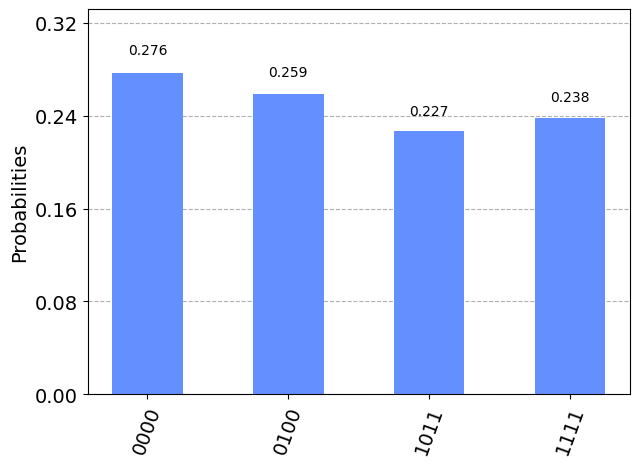

In [42]:


simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)